In [1]:
# import libraries
import pandas as pd
from scipy import stats

%matplotlib inline

In [2]:
# import data from subreddits scraped using query "vaccine"
conservative_vaccine = pd.read_csv("data/conservative_vaccine.csv")
politics_vaccine = pd.read_csv("data/politics_vaccine.csv")
COVID19_vaccine = pd.read_csv("data/COVID19_vaccine.csv")

In [3]:
def combine_by_date(df, subreddit, feature, method):
    """Takes in collected dataframe and returns a new dataframe
    where the selected feature is transformed and then grouped by date."""
    
    new_df = pd.DataFrame(columns=[subreddit])
    
    if method == "mean":
        new_df[subreddit] = df.groupby("date")[feature].mean()
        new_df = new_df.rolling(30, min_periods=1)
        new_df = new_df.mean()
        
    elif method == "count":
        new_df[subreddit] = df.groupby("date")[feature].count()
        new_df = new_df.rolling(30, min_periods=1)
        new_df = new_df.mean()
        
    else:
        pass
    
    return new_df

def combine_df(dfs):
    """Takes in a list of dataframes and combines them for visualization."""
    counter, stop = 1, len(dfs)
    new_df = dfs[0]
    
    while counter < stop:
        new_df = new_df.join(dfs[counter], how="outer")
        counter += 1
        
    new_df = new_df.iloc[30:,:]
    new_df = new_df.interpolate()
    return new_df

<AxesSubplot:title={'center':'Sentiment Analysis of Comments Related to Vaccines'}, xlabel='Date', ylabel='Sentiment Score (higher is more positive)'>

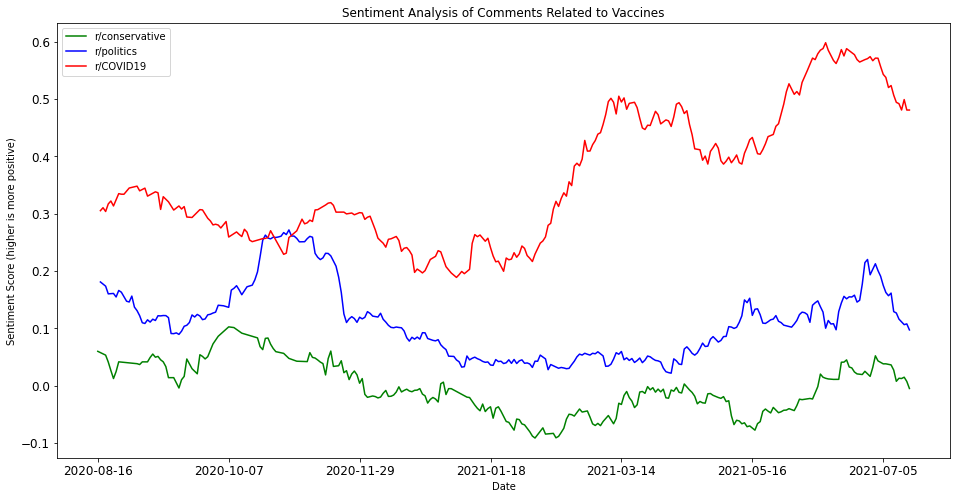

In [4]:
conservative = combine_by_date(conservative_vaccine, "r/conservative", "compound_sentiment", "mean")
politics = combine_by_date(politics_vaccine, "r/politics", "compound_sentiment", "mean")
COVID19 = combine_by_date(COVID19_vaccine, "r/COVID19", "compound_sentiment", "mean")

df_list = [conservative, politics, COVID19]

plot_df = combine_df(df_list)

plot_df.plot(rot=0,xlabel="Date", 
             ylabel="Sentiment Score (higher is more positive)", fontsize=12, color = ['g', 'b', 'r'],
             figsize=(16, 8), title="Sentiment Analysis of Comments Related to Vaccines")

<AxesSubplot:title={'center':'Number of Comments Related to Vaccines'}, xlabel='Date', ylabel='Number of Posts'>

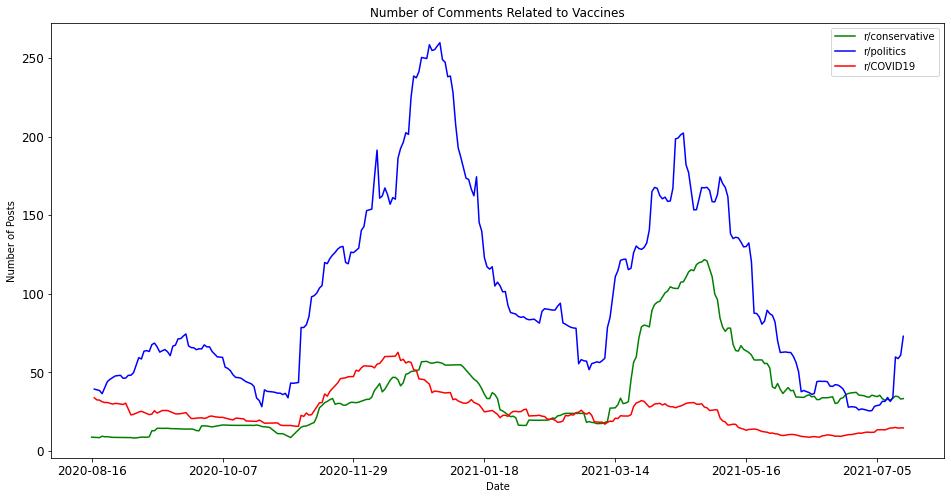

In [5]:
conservative = combine_by_date(conservative_vaccine, "r/conservative", "compound_sentiment", "count")
politics = combine_by_date(politics_vaccine, "r/politics", "compound_sentiment", "count")
COVID19 = combine_by_date(COVID19_vaccine, "r/COVID19", "compound_sentiment", "count")

df_list = [conservative, politics, COVID19]

plot_df = combine_df(df_list)

plot_df.plot(rot=0,xlabel="Date", 
             ylabel="Number of Posts", fontsize=12, color = ['g', 'b', 'r'],
             figsize=(16, 8), title="Number of Comments Related to Vaccines")